# Exploring the Dataset

Let us go ahead and import one of the given pickle files from the data set and see what all they gave us as labels. Along the way, we can figure out what the data means and how to work with it.

In [1]:
import pickle
import numpy as np

In [2]:
pickle.HIGHEST_PROTOCOL

5

In [6]:
# Path to the C:\Work-stress-predictor\Work-Stress\WESAD\WESAD
data_set = 'C:/Work-stress-predictor/Work-Stress/WESAD/WESAD/'
s2_path = data_set + 'S2/S2.pkl'
# we have to change the encoding because the data appears to have been
# pickled with py2 and we are in py 3
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [7]:
count=len(s2_data['label'])
print('subject', s2_data['subject'])
print('labels array', (s2_data['label']))
print('signal', s2_data['signal'])
print('len(labels array)=',count)

subject S2
labels array [0 0 0 ... 0 0 0]
signal {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
       [31.456268]], dtype=float32), 'Resp': array([[-1.14

It appears that our dictionary has three primary entries: Signal, label, and subject, which aligns with the documentation for the WESAD dataset. The "signal" section contains the recorded data points from the two devices used in the study, while the "label" section specifies the scenario that the subject was experiencing when the data was collected.

In [8]:
baseline=1
baseline_indices = np.nonzero(s2_data['label']==baseline)[0]
print(baseline_indices, 
      '\nlen=', len(baseline_indices), 
      '\n % of total data=', len(baseline_indices)/count)

[ 214583  214584  214585 ... 1015380 1015381 1015382] 
len= 800800 
 % of total data= 0.18818884684981083


In [9]:
#  Let's extract the indices for the stress measurements, label[n]=2
stress=2
stress_indices = np.nonzero(s2_data['label']==stress)[0]
print(baseline_indices, 
      '\nlen=', len(stress_indices), 
      '\n % of total data=', len(stress_indices)/count)

[ 214583  214584  214585 ... 1015380 1015381 1015382] 
len= 430500 
 % of total data= 0.10116795525579865


In [11]:
range_to_plot=range(1000)
baseline_to_plot=baseline_indices[range_to_plot]
stress_to_plot=stress_indices[range_to_plot]
print('baseline indices=', baseline_to_plot)
print('stress indices=', stress_to_plot)


baseline indices= [214583 214584 214585 214586 214587 214588 214589 214590 214591 214592
 214593 214594 214595 214596 214597 214598 214599 214600 214601 214602
 214603 214604 214605 214606 214607 214608 214609 214610 214611 214612
 214613 214614 214615 214616 214617 214618 214619 214620 214621 214622
 214623 214624 214625 214626 214627 214628 214629 214630 214631 214632
 214633 214634 214635 214636 214637 214638 214639 214640 214641 214642
 214643 214644 214645 214646 214647 214648 214649 214650 214651 214652
 214653 214654 214655 214656 214657 214658 214659 214660 214661 214662
 214663 214664 214665 214666 214667 214668 214669 214670 214671 214672
 214673 214674 214675 214676 214677 214678 214679 214680 214681 214682
 214683 214684 214685 214686 214687 214688 214689 214690 214691 214692
 214693 214694 214695 214696 214697 214698 214699 214700 214701 214702
 214703 214704 214705 214706 214707 214708 214709 214710 214711 214712
 214713 214714 214715 214716 214717 214718 214719 214720 21

In [12]:
print(s2_data['signal']['chest'])

{'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
       [31.456268]], dtype=float32), 'Resp': array([[-1.14898682],
       [-1.12457275],
       [-1.15203857],
      

In this step, we are getting ready to compare data from the chest baseline measurements to the chest stress measurements for 128 samples. It's important to note that this is raw data and we'll need to consider calculating some features to make sense of it. Plotting the raw data may not provide much insight.

In [13]:
chest_baseline = {}
chest_stress = {}


chest_baseline['ACC'] = s2_data['signal']['chest']['ACC'][baseline_to_plot]
chest_baseline['ECG'] = s2_data['signal']['chest']['ECG'][baseline_to_plot]
chest_baseline['EDA'] = s2_data['signal']['chest']['EDA'][baseline_to_plot]
chest_baseline['EMprint('chest stress=', chest_stress['EDA'] )G'] = s2_data['signal']['chest']['EMG'][baseline_to_plot]
chest_baseline['Resp'] = s2_data['signal']['chest']['Resp'][baseline_to_plot]
chest_baseline['Temp'] = s2_data['signal']['chest']['Temp'][baseline_to_plot]

chest_stress['ACC'] = s2_data['signal']['chest']['ACC'][stress_to_plot]
chest_stress['ECG'] = s2_data['signal']['chest']['ECG'][stress_to_plot]
chest_stress['EDA'] = s2_data['signal']['chest']['EDA'][stress_to_plot]
chest_stress['EMG'] = s2_data['signal']['chest']['EMG'][stress_to_plot]
chest_stress['Resp'] = s2_data['signal']['chest']['Resp'][stress_to_plot]
chest_stress['Temp'] = s2_data['signal']['chest']['Temp'][stress_to_plot]

In [14]:
print('chest stress=', chest_stress['EDA'] )

chest stress= [[1.27830505]
 [1.25274658]
 [1.24549866]
 [1.2462616 ]
 [1.26190186]
 [1.24473572]
 [1.27792358]
 [1.25389099]
 [1.24397278]
 [1.27906799]
 [1.2550354 ]
 [1.24664307]
 [1.24588013]
 [1.27449036]
 [1.25617981]
 [1.24511719]
 [1.27067566]
 [1.25465393]
 [1.24320984]
 [1.26914978]
 [1.25427246]
 [1.24969482]
 [1.24702454]
 [1.26075745]
 [1.24702454]
 [1.29585266]
 [1.26113892]
 [1.25732422]
 [1.2424469 ]
 [1.26686096]
 [1.25694275]
 [1.24511719]
 [1.28250122]
 [1.25923157]
 [1.25045776]
 [1.24664307]
 [1.26266479]
 [1.25465393]
 [1.24740601]
 [1.25732422]
 [1.24473572]
 [1.28097534]
 [1.25808716]
 [1.24664307]
 [1.28211975]
 [1.25923157]
 [1.25389099]
 [1.24664307]
 [1.28059387]
 [1.25770569]
 [1.24778748]
 [1.2676239 ]
 [1.25808716]
 [1.2462616 ]
 [1.27716064]
 [1.25465393]
 [1.24702454]
 [1.24778748]
 [1.26953125]
 [1.25198364]
 [1.24702454]
 [1.29013062]
 [1.25999451]
 [1.24893188]
 [1.30462646]
 [1.25007629]
 [1.25541687]
 [1.24702454]
 [1.27639771]
 [1.25465393]
 [1.24

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

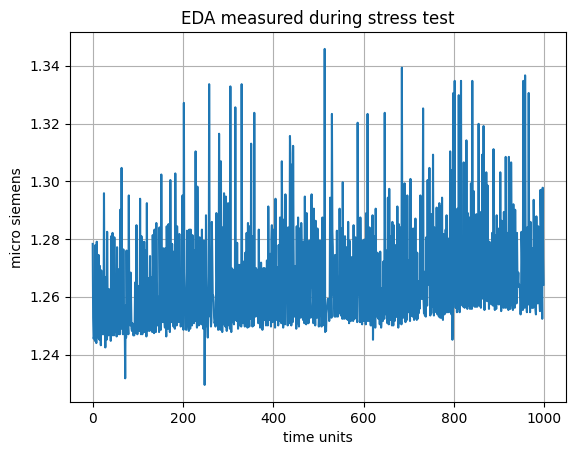

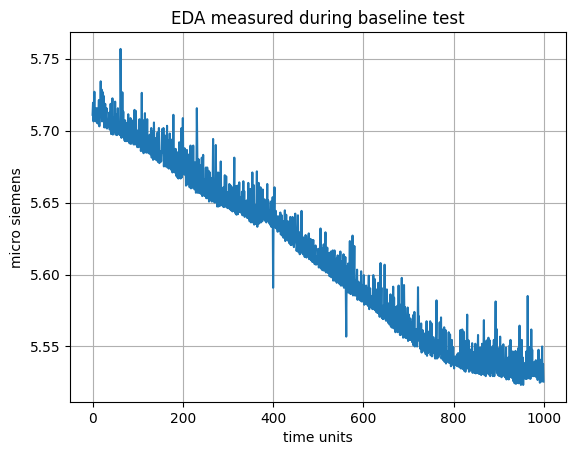

In [16]:
fig1, ax1 = plt.subplots()
ax1.plot(range_to_plot, chest_stress['EDA'])

ax1.set(xlabel='time units', ylabel = 'micro siemens', title = 'EDA measured during stress test')
ax1.grid()
plt.show()



fig, ax = plt.subplots()
ax.plot(range_to_plot, chest_baseline['EDA'])

ax.set(xlabel='time units', ylabel = 'micro siemens', title = 'EDA measured during baseline test')
ax.grid()
plt.show()

In [17]:
#The GSR data is sampled at 4hz, lets go ahead and just plot more points with a step of 4
range_to_plot2=range(13001, 17000, 4)
baseline_to_plot2=baseline_indices[range_to_plot]
stress_to_plot2=stress_indices[range_to_plot]

chest_baseline2 = {}
chest_stress2 = {}

chest_baseline2['ACC'] = s2_data['signal']['chest']['ACC'][baseline_to_plot2]
chest_baseline2['ECG'] = s2_data['signal']['chest']['ECG'][baseline_to_plot2]
chest_baseline2['EDA'] = s2_data['signal']['chest']['EDA'][baseline_to_plot2]
chest_baseline2['EMG'] = s2_data['signal']['chest']['EMG'][baseline_to_plot2]
chest_baseline2['Resp'] = s2_data['signal']['chest']['Resp'][baseline_to_plot2]
chest_baseline2['Temp'] = s2_data['signal']['chest']['Temp'][baseline_to_plot2]

chest_stress2['ACC'] = s2_data['signal']['chest']['ACC'][stress_to_plot2]
chest_stress2['ECG'] = s2_data['signal']['chest']['ECG'][stress_to_plot2]
chest_stress2['EDA'] = s2_data['signal']['chest']['EDA'][stress_to_plot2]
chest_stress2['EMG'] = s2_data['signal']['chest']['EMG'][stress_to_plot2]
chest_stress2['Resp'] = s2_data['signal']['chest']['Resp'][stress_to_plot2]
chest_stress2['Temp'] = s2_data['signal']['chest']['Temp'][stress_to_plot2]

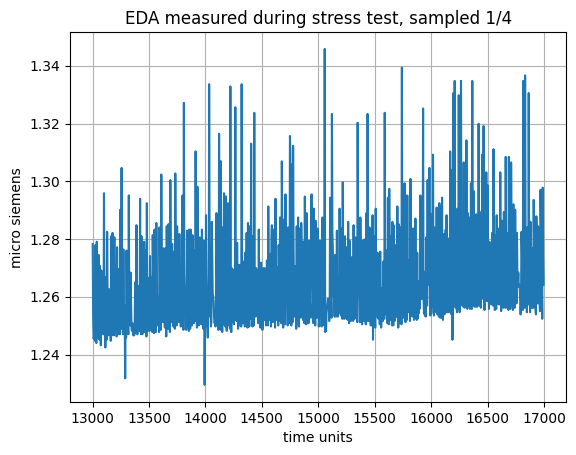

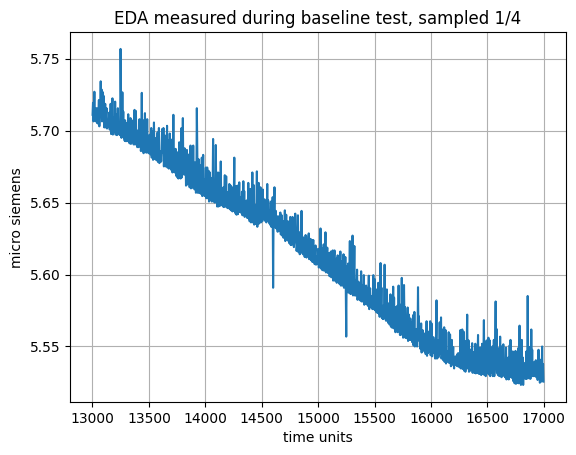

In [18]:
fig2, ax2 = plt.subplots()
ax2.plot(range_to_plot2, chest_stress2['EDA'])

ax2.set(xlabel='time units', ylabel = 'micro siemens', title = 'EDA measured during stress test, sampled 1/4')
ax2.grid()
plt.show()



fig3, ax3 = plt.subplots()
ax3.plot(range_to_plot2, chest_baseline2['EDA'])

ax3.set(xlabel='time units', ylabel = 'micro siemens', title = 'EDA measured during baseline test, sampled 1/4')
ax3.grid()
plt.show()

In [19]:
print(len(chest_stress2['EDA']))
print(len(chest_baseline2['EDA']))
print(range_to_plot2)

1000
1000
range(13001, 17000, 4)


In [20]:
base_mean = np.mean(s2_data['signal']['chest']['EDA'][baseline_indices])
stress_mean = np.mean(s2_data['signal']['chest']['EDA'][stress_indices])

print('base mean:\t', base_mean, '\nstress mean:\t', stress_mean, '\ndifference:\t', abs(base_mean - stress_mean))
print('\n-')


base_median = np.median(s2_data['signal']['chest']['EDA'][baseline_indices])
stress_median = np.median(s2_data['signal']['chest']['EDA'][stress_indices])

print('base median:\t', base_median , '\nstress median:\t', stress_median, '\ndifference:\t', abs(base_median  - stress_median))
print('\n-')

base_min = np.min(s2_data['signal']['chest']['EDA'][baseline_indices])
stress_min = np.min(s2_data['signal']['chest']['EDA'][stress_indices])

print('base min:\t', base_min, '\nstress min:\t', stress_min, '\ndifference:\t', abs(base_min - stress_min))
print('\n-')

base_max = np.max(s2_data['signal']['chest']['EDA'][baseline_indices])
stress_max = np.max(s2_data['signal']['chest']['EDA'][stress_indices])

print('base max:\t', base_max , '\nstress max:\t', stress_max, '\ndifference:\t', abs(base_max  - stress_max))
print('\n-')



base mean:	 2.0565166763968756 
stress mean:	 1.796925323876216 
difference:	 0.2595913525206597

-
base median:	 1.6033172607421875 
stress median:	 1.4995574951171875 
difference:	 0.103759765625

-
base min:	 0.913238525390625 
stress min:	 0.968170166015625 
difference:	 0.054931640625

-
base max:	 5.7567596435546875 
stress max:	 3.4427642822265625 
difference:	 2.313995361328125

-
